<a href="https://colab.research.google.com/github/mvs0301/PDAPython/blob/main/%D0%9F%D1%80%D0%90%D0%94%D0%9F%D0%B0%D0%B9%D1%82%D0%BE%D0%BD_%D0%94%D0%97_%D0%9D%D0%BE%D1%8F%D0%B1%D1%80%D1%8C_2021_%D0%9F%D1%80%D0%B5%D0%BF%D0%BE%D0%B4%D0%B0%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Финансовый университет при Правительстве Российской Федерации

# Программирование и анализ данных с помощью Пайтон

Поток: УЦИ20-1

Домашнее задание
для выполнения в период нерабочих дней
с 28 октября по 7 ноября 2021 года

## Тема: Обработка данных из открытых источников

## I. Получение данных из открытого источника

1. На портале открытых данных Правительства Москвы data.mos.ru в разделе "ОБразование" получите набор данных № 254 "Образовательные организации высшего образования, осуществляющие деятельность на территории города Москвы и предоставляющие право на бесплатное оформление социальной карты" в формате JSON.
2. Изучите структуру данных, паспорт данных.
3. Проведите десериализацию JSON-файла.

## II. Обработка данных в формате JSON

Выполните задания.

1. Загрузите содердимое JSON-файла в таблицу Pandas.
2. Выполните запрос, выводящий на печать число образовательных организаций в каждом административном округе Москвы.
3. Выполните запрос,  выводящий на печать число образовательных организаций, подведомственных Министерству культуры, в каждом административном округе Москвы.
4. Распечатайте информацию о числе образовательных организаций с группировкой по должности руководителя.
5. Составьте сводную таблицу, отображающую количество организаций различной формы собственности (TypeOfOwnership) в каждом административном округе (AdmArea) Москвы. В каком округе расположено наибольшее число образовательных организаций негосударственной формы собственности? В каких округах отсутствуют образовательные организации негосударственной формы собственности? Распечатайте названия округов, в которых число государственных образовательных организаций выше среднего числа организаций в округе по Москве.
6. Постройте столбчатую диаграмму числа образовательных организаций негосударственной формы собственности в каждом административном округе Москвы.
7. Сколько в каждом административном округе Москвы районов, в которых имеются образовательные организации?


In [1]:
import json
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

In [2]:
files.upload()

Saving data-28943-2021-10-22.json to data-28943-2021-10-22 (1).json


{'data-28943-2021-10-22.json': b'[{"global_id":639894029,"ID":59,"Code":59,"FullName":"\xc0\xe2\xf2\xee\xed\xee\xec\xed\xe0\xff \xed\xe5\xea\xee\xec\xec\xe5\xf0\xf7\xe5\xf1\xea\xe0\xff \xee\xf0\xe3\xe0\xed\xe8\xe7\xe0\xf6\xe8\xff \xe2\xfb\xf1\xf8\xe5\xe3\xee \xee\xe1\xf0\xe0\xe7\xee\xe2\xe0\xed\xe8\xff \xab\xcc\xee\xf1\xea\xee\xe2\xf1\xea\xe8\xe9 \xe3\xf3\xec\xe0\xed\xe8\xf2\xe0\xf0\xed\xfb\xe9 \xf3\xed\xe8\xe2\xe5\xf0\xf1\xe8\xf2\xe5\xf2\xbb","ShortName":[{"ShortName":"\xc0\xcd\xce \xc2\xce \xab\xcc\xee\xf1\xea\xee\xe2\xf1\xea\xe8\xe9 \xe3\xf3\xec\xe0\xed\xe8\xf2\xe0\xf0\xed\xfb\xe9 \xf3\xed\xe8\xe2\xe5\xf0\xf1\xe8\xf2\xe5\xf2\xbb"}],"CommonName":"\xcc\xee\xf1\xc3\xf3","AdmArea":"\xc2\xee\xf1\xf2\xee\xf7\xed\xfb\xe9 \xe0\xe4\xec\xe8\xed\xe8\xf1\xf2\xf0\xe0\xf2\xe8\xe2\xed\xfb\xe9 \xee\xea\xf0\xf3\xe3","District":"\xf0\xe0\xe9\xee\xed \xc2\xe5\xf8\xed\xff\xea\xe8","ZipCode":"111395","Address":"\xe3\xee\xf0\xee\xe4 \xcc\xee\xf1\xea\xe2\xe0, \xf3\xeb\xe8\xf6\xe0 \xde\xed\xee\xf1\xf2\xe8,

In [3]:
with open("data-28943-2021-10-22.json", encoding="cp1251") as f:
  data=json.load(f)

In [4]:
len(data)

296

In [5]:
#1 Pandas
df=pd.DataFrame(data)
df.head()

,global_id,ID,Code,FullName,ShortName,CommonName,AdmArea,District,ZipCode,Address,LegalAddress,ChiefPosition,ChiefName,BaseDoc,PublicPhone,Fax,Email,WebSite,Bank,INN,KPP,OGRN,StateAccStatus,StateAccNum,StateAccDocSer,StateAccDocNum,StateAccDate,StateAccExp,LicStatus,LicNum,LicDocSer,LicDocNum,LicDate,LicExp,TypeOfOwnership,Subord,geoData,geodata_center
0,639894029,59,59,Автономная некоммерческая организация высшего ...,[{'ShortName': 'АНО ВО «Московский гуманитарны...,МосГу,Восточный административный округ,район Вешняки,111395,"город Москва, улица Юности, дом 5","111395, город Москва, улица Юности, дом 5",ректор,Ильинский Игорь Михайлович,Устав,"[{'PublicPhone': '(499) 374-51-51'}, {'PublicP...",(499) 374-78-78,[{'Email': 'info@mosgu.ru'}],[{'WebSite': 'mosgu.ru'}],ПАО Сбербанк,7720490619,772001001,1127799015277,Действующее,3098,90А01,0003258,30.04.2019,30.04.2025,Действует,1709,90Л01,0008723,13.10.2015,бессрочно,негосударственное,"Организации, учрежденные юридическими лицами и...","{'coordinates': [37.8139731143603, 55.72958086...","{'coordinates': [37.8139731143603, 55.72958086..."
1,639894030,18,18,Федеральное государственное бюджетное образова...,[{'ShortName': 'ФГБОУ ВО «МГТУ «СТАНКИН»'}],СТАНКИН,Центральный административный округ,Тверской район,127055,"город Москва, Вадковский переулок, дом 3А, стр...","127055, город Москва, Вадковский переулок, дом...",исполняющий обязанности ректора,Серебренный Владимир Валерьевич,Устав,"[{'PublicPhone': '(499) 972-94-00'}, {'PublicP...",,[{'Email': 'rector@stankin.ru'}],[{'WebSite': 'stankin.ru'}],ГУ Банка России по ЦФО//УФК по г. Москве г. Мо...,7707003506,770701001,1037700246451,Действующее,3366,90А01,0003582,31.03.2020,31.03.2026,Действует,1663,90Л01,0008677,22.09.2015,бессрочно,государственное,Министерство науки и высшего образования Росси...,"{'coordinates': [37.5958793909775, 55.79014315...","{'coordinates': [37.5958793909775, 55.79014315..."
2,639894031,51,51,Федеральное государственное бюджетное образова...,[{'ShortName': 'Всероссийский государственный ...,ВГИК,Северо-Восточный административный округ,район Ростокино,129226,"город Москва, улица Вильгельма Пика, дом 3","129226, город Москва, улица Вильгельма Пика, д...",исполняющий обязанности ректора,Малышев Владимир Сергеевич,Устав,"[{'PublicPhone': '(499) 181-13-14'}, {'PublicP...",(499) 181-80-74,[{'Email': 'mail@vgik.info'}],[{'WebSite': 'vgik.info'}],ГУ Банка России по ЦФО // УФК по г. Москве г.М...,7717032440,771701001,1037739313700,Действующее,1695,90А01,0001788,03.03.2016,02.12.2022,Действует,1665,90Л01,0008683,28.09.2015,бессрочно,государственное,Федеральное агентство по культуре и кинематогр...,"{'coordinates': [37.637228655914, 55.835056272...","{'coordinates': [37.637228655914, 55.835056272..."
3,639894032,52,52,Федеральное государственное бюджетное образова...,[{'ShortName': 'ВГУЮ (РПА Минюста России)'}],РПА Минюста,Юго-Западный административный округ,район Зюзино,117638,"город Москва, Азовская улица, дом 2, корпус 1","117638, город Москва, Азовская улица, дом 2, к...",ректор,Александрова Ольга Ивановна,Устав,[{'PublicPhone': '(499) 963-01-01'}],,[{'Email': 'rpa@rpa-mjust.ru'}],[{'WebSite': 'rpa-mu.ru'}],ГУ Банка России по ЦФО // УФК по г. Москве г.М...,7719061340,772701001,1027700162676,Действующее,1519,90А01,0001610,09.11.2015,19.11.2022,Действует,1573,90Л01,0008577,24.07.2015,бессрочно,государственное,Министерство юстиции Российской Федерации,"{'coordinates': [37.6046679913554, 55.66266031...","{'coordinates': [37.6046679913554, 55.66266031..."
4,639894033,60,60,Федеральное государственное бюджетное образова...,[{'ShortName': 'МГАХИ им. В.И. Сурикова'}],МГАХИ им. Сурикова,Центральный административный округ,Таганский район,109004,"город Москва, Товарищеский переулок, дом 30, с...","109004, город Москва, Товарищеский переулок, д...",ректор,Любавин Анатолий Александрович,Устав,"[{'PublicPhone': '(495) 632-72-16'}, {'PublicP...",,[{'Email': 'umo.mgahi@yandex.ru'}],[{'WebSite': 'surikov-vuz.com'}],ГУ Банка России по 

In [6]:
#2 Сколько образовательных организаций в каждом из административных округов?
result2=df.groupby(["AdmArea"])["ID"].count().sort_index()
result2

AdmArea
Восточный административный округ            22
Западный административный округ             18
Зеленоградский административный округ        1
Северный административный округ             31
Северо-Восточный административный округ     17
Северо-Западный административный округ       9
Центральный административный округ         105
Юго-Восточный административный округ        10
Юго-Западный административный округ         60
Южный административный округ                23
Name: ID, dtype: int64

In [7]:
#3 Подведомственных Министерству культуры
df[df['Subord']=="Министерство культуры Российской Федерации"].groupby("AdmArea")["ID"].count()

AdmArea
Западный административный округ             1
Северный административный округ             1
Северо-Восточный административный округ     1
Центральный административный округ         10
Юго-Западный административный округ         1
Name: ID, dtype: int64

In [8]:
#4 Число образовательных организаций с группировкой по должности руководителя
df['ChiefPosition'].value_counts()

директор                             128
ректор                               108
генеральный директор                  17
исполняющий обязанности ректора       17
исполняющий обязанности директора     14
начальник                              4
исполнительный директор                4
президент                              2
председатель совета                    1
начальник академии                     1
Name: ChiefPosition, dtype: int64

In [9]:
#5 Сводная таблица
# Составьте сводную таблицу, отображающую число организаций различной формы собственности (TypeOfOwnership) в каждом административном округе (AdmArea) Москвы.
# В каком округе Москвы (AdmArea) расположено наибольшее число образовательных организаций негосударственной формы собственности?
# В каких округах отсутствуют образовательные организации негосударственной формы собственности?
# Распечатайте названия округов, в которых число государственных образовательных организаций выше среднего числа организаций в округе по Москве.
p=df.pivot_table(index='AdmArea', columns='TypeOfOwnership', values='ID', aggfunc='count')
p

TypeOfOwnership,государственное,негосударственное
AdmArea,,
Восточный административный округ,12.0,10.0
Западный административный округ,12.0,6.0
Зеленоградский административный округ,1.0,NaN
Северный административный округ,25.0,6.0
Северо-Восточный административный округ,11.0,6.0
Северо-Западный административный округ,9.0,NaN
Центральный административный округ,88.0,17.0
Юго-Восточный административный округ,7.0,3.0
Юго-Западный административный округ,57.0,3.0


In [10]:
#5 Продолжение
p["государственное"][p["государственное"]>p["государственное"].mean()]

AdmArea
Северный административный округ        25.0
Центральный административный округ     88.0
Юго-Западный административный округ    57.0
Name: государственное, dtype: float64

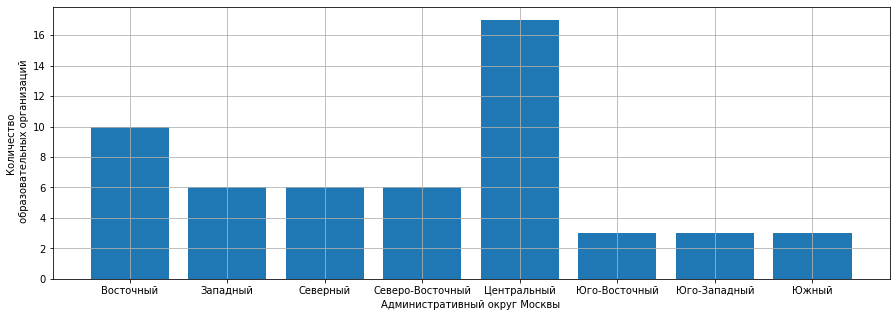

In [11]:
#6 столбчатую диаграмму числа образовательных организаций негосударственной формы собственности
private=p["негосударственное"]
private.dropna(inplace=True)
h=[x.split()[0][:] for x in private.index]

plt.figure(figsize=(15,5))
plt.bar(np.arange(len(private)),private.loc[:])
plt.xticks(ticks=np.arange(len(private)),labels=h)
plt.xlabel("Административный округ Москвы")
plt.ylabel("Количество \n образовательных организаций")
plt.grid()

In [12]:
#7 Сколько районов, в которых имеются образовательные организации?
a=df.groupby(["AdmArea","District"])["ID"].count()
adf=a.reset_index()
result7=adf["AdmArea"].value_counts().sort_index()
result7

Восточный административный округ            9
Западный административный округ             8
Зеленоградский административный округ       1
Северный административный округ            11
Северо-Восточный административный округ     8
Северо-Западный административный округ      3
Центральный административный округ         10
Юго-Восточный административный округ        5
Юго-Западный административный округ        11
Южный административный округ                6
Name: AdmArea, dtype: int64

In [13]:
# Дополнительно. Постройте диаграмму разброса числа образовательных организаций от числа районов
result=pd.concat([result2,result7],axis=1)
result

,ID,AdmArea
AdmArea,,
Восточный административный округ,22,9
Западный административный округ,18,8
Зеленоградский административный округ,1,1
Северный административный округ,31,11
Северо-Восточный административный округ,17,8
Северо-Западный административный округ,9,3
Центральный административный округ,105,10
Юго-Восточный административный округ,10,5
Юго-Западный административный округ,60,11


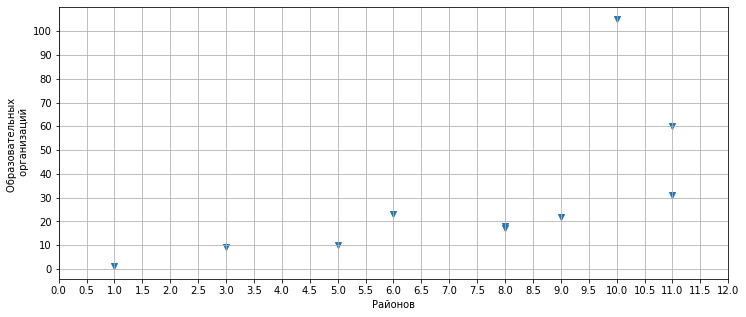

In [14]:
plt.figure(figsize=(12,5))
plt.scatter(result["AdmArea"], result["ID"],marker="v")
plt.xlabel("Районов")
plt.ylabel("Образовательных \n организаций")
plt.xticks(ticks=np.arange(12.5,step=0.5))
plt.yticks(ticks=np.arange(110, step=10))
plt.grid()